# 과제 - Bigmart Sales Prediction

In [439]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [440]:
df_train = pd.read_csv('sales_train.csv')

In [441]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- 결측값 채우기

In [442]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [443]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [444]:
# 매장 크기의 최빈값, 상품 무게의 평균값 구하기
df_train['Outlet_Size'].mode().values[0], round(df_train['Item_Weight'].mean(), 2)

('Medium', 12.86)

In [445]:
# 결측치에 매장 크기 최빈값, 상품의 무게 평균값 넣기
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode().values[0], inplace=True)
df_train['Item_Weight'].fillna(round(df_train['Item_Weight'].mean(), 2), inplace=True)


In [446]:
# 결측치 없는지 확인
df_train['Outlet_Size'].isnull().sum()

0

상품의 전시 비율이 0이 될 수 없으므로 0인 값을 평균값으로 변경

In [447]:
df_train['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [448]:
# 상품 전시 비율 평균값 구하기
vis_avg = round(df_train['Item_Visibility'].mean(), 6)
vis_avg

0.066132

In [449]:
# 상품 전시 비율이 0인 값에 평균값 넣기
df_train['Item_Visibility'] = df_train['Item_Visibility'].apply(lambda x : vis_avg if x == 0 else x)   

In [450]:
# 0인 값에 평균값이 들어갔는지 확인
df_train['Item_Visibility'].value_counts()

0.066132    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

상품 지방 함량에 동일한 의미이지만 표기가 다른 값이 있기에 통일

In [451]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [452]:
# replace 함수를 사용하여 표기 통일
df_train['Item_Fat_Content'].replace(['LF',"low fat",'reg'], ['Low Fat','Low Fat','Regular'],inplace=True)

In [453]:
# LF, reg, low fat 변경 확인
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

매장의 설립일자보다 매장의 운영년도를 수치로 나타내는게 회귀 그래프에 적절함

In [454]:
df_train['Age_of_Oulet'] = 2022 - df_train['Outlet_Establishment_Year']


In [455]:
df_train = df_train.drop(['Outlet_Establishment_Year'], axis=1)

In [456]:
df_train['Age_of_Oulet'].value_counts()

37    1463
35     932
23     930
25     930
18     930
20     929
13     928
15     926
24     555
Name: Age_of_Oulet, dtype: int64

상품 ID의 앞자리 두글자가 상품의 종류를 뜻하므로 두자리만 슬라이싱

In [457]:
df_train['Item_Identifier'] = df_train['Item_Identifier'].apply(lambda x: x[0 : 2])

In [458]:
df_train['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

범주형 데이터들을 인코딩

In [459]:
from sklearn.preprocessing import LabelEncoder

In [460]:
le = LabelEncoder()

In [461]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_of_Oulet
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FD,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,24
4,NC,8.93,Low Fat,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35


In [462]:
df_train['Item_Identifier'] = le.fit_transform(df_train['Item_Identifier'])
df_train['Item_Fat_Content'] = le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type'] = le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size'] = le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type'] = le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type'] = le.fit_transform(df_train['Outlet_Type'])

df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_of_Oulet
0,1,9.30,0,0.016047,4,249.8092,OUT049,1,0,1,3735.1380,23
1,0,5.92,1,0.019278,14,48.2692,OUT018,1,2,2,443.4228,13
2,1,17.50,0,0.016760,10,141.6180,OUT049,1,0,1,2097.2700,23
3,1,19.20,1,0.066132,6,182.0950,OUT010,1,2,0,732.3800,24
4,2,8.93,0,0.066132,9,53.8614,OUT013,0,2,1,994.7052,35


필요없는 컬럼 드롭

In [463]:
df_train.drop(['Outlet_Identifier'], axis=1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_of_Oulet
0,1,9.300,0,0.016047,4,249.8092,1,0,1,3735.1380,23
1,0,5.920,1,0.019278,14,48.2692,1,2,2,443.4228,13
2,1,17.500,0,0.016760,10,141.6180,1,0,1,2097.2700,23
3,1,19.200,1,0.066132,6,182.0950,1,2,0,732.3800,24
4,2,8.930,0,0.066132,9,53.8614,0,2,1,994.7052,35
...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,0,2,1,2778.3834,35
8519,1,8.380,1,0.046982,0,108.1570,1,1,1,549.2850,20
8520,2,10.600,0,0.035186,8,85.1224,2,1,1,1193.1136,18
8521,1,7.210,1,0.145221,13,103.1332,1,2,2,1845.5976,13


In [464]:
df_train = df_train[['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Age_of_Oulet','Item_Outlet_Sales']]

#### 데이터 시각화

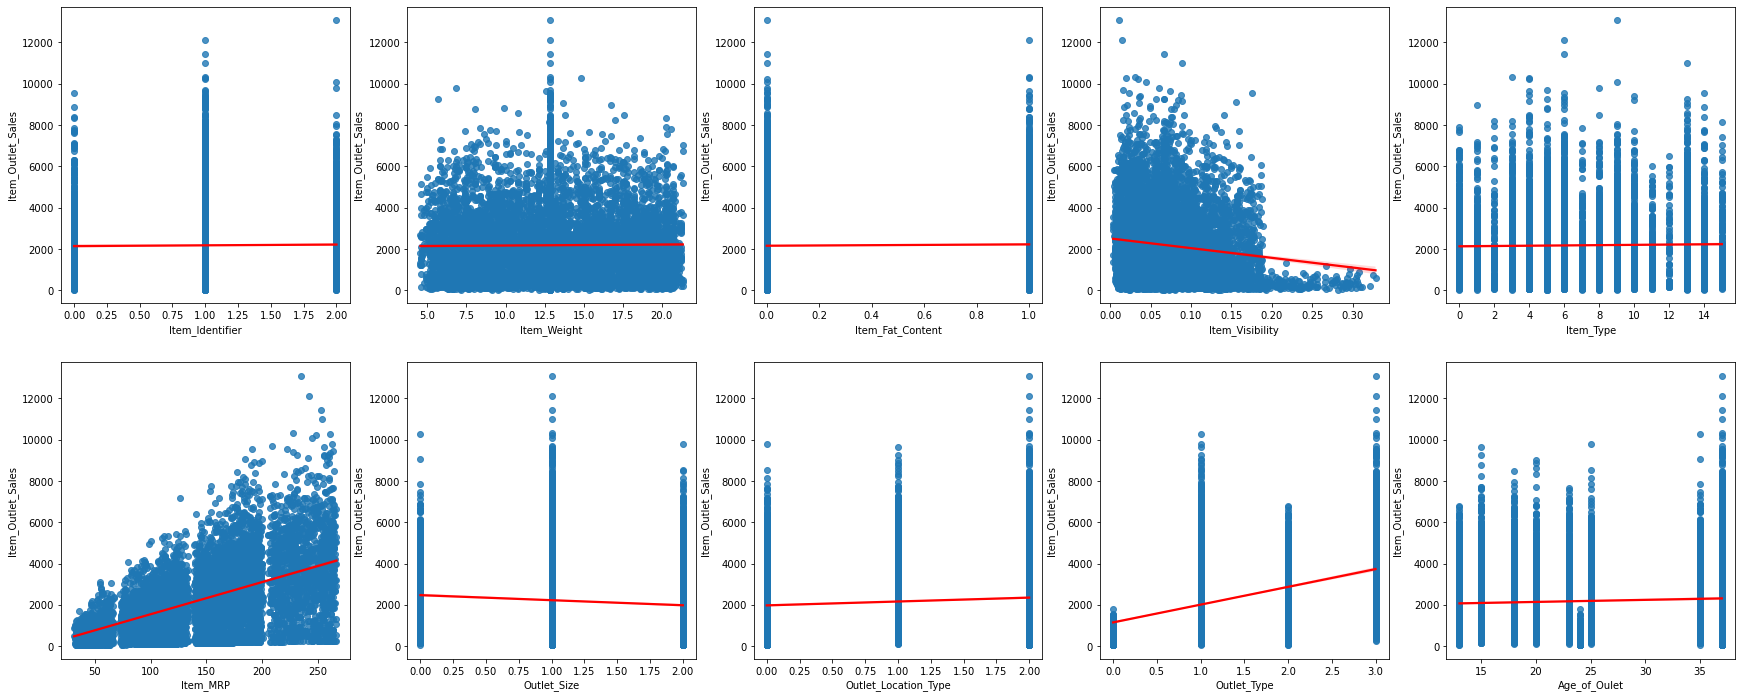

In [465]:
_, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (30, 12))
for i, column in enumerate(df_train.columns[0:-1]):
    row, col = i // 5, i % 5
    sns.regplot(x = column, y = 'Item_Outlet_Sales', data = df_train, ax = axs[row][col], line_kws={'color':'red'})

각 컬럼별 R squared value

In [466]:
from sklearn.linear_model import LinearRegression

In [467]:
y = df_train['Item_Outlet_Sales']
for column in df_train.columns[:-1]:
    X = df_train[column].values.reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print(f'{column}: {r2:.4f}')


Item_Identifier: 0.0001
Item_Weight: 0.0001
Item_Fat_Content: 0.0004
Item_Visibility: 0.0180
Item_Type: 0.0003
Item_MRP: 0.3221
Outlet_Size: 0.0074
Outlet_Location_Type: 0.0080
Outlet_Type: 0.1612
Age_of_Oulet: 0.0024


Item_MRP vs Item_Outlet_Sales
- Item_MRP의 설명력이 컬럼 중 제일 높음

In [468]:
X = df_train['Item_MRP'].values.reshape(-1, 1)

In [469]:
# Item_MRP의 설명력이 높기에 선택
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, df_train['Item_Outlet_Sales'], test_size=0.1, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7670, 1), (853, 1), (7670,), (853,))

In [470]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.3577367806660219

In [471]:
lr.coef_, lr.intercept_, lr._residues

(array([15.48478217]), -4.672751774833159, 15316323858.217464)

In [472]:
from sklearn.metrics import r2_score
pred_lr = lr.predict(X_test)
r2_score(y_test, pred)

0.3577367806660219

In [473]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, pred_lr)
rmse_lr = np.sqrt(mse_lr)
mse_lr, rmse_lr

(1766126.2592614936, 1328.956831225715)

In [474]:
y_test[0], pred_lr[0]

(3735.138, 2882.551598113608)

In [475]:
weight, bias = lr.coef_[0], lr.intercept_
rss = lr._residues
weight, bias, rss

(15.484782167381626, -4.672751774833159, 15316323858.217464)

시각화

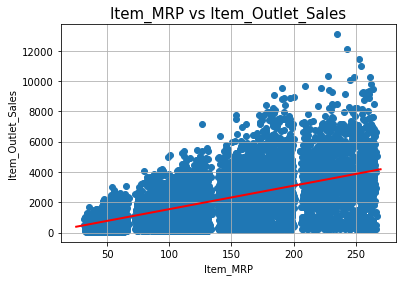

In [476]:
plt.scatter(X_train, y_train)
plt.plot([25,270], [25 * weight + bias, 270 * weight + bias], 'r-', lw=2)
plt.grid()
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_MRP vs Item_Outlet_Sales', fontsize=15)
plt.show()

In [477]:
xs = np.array([25, 270])
ys = xs * lr.coef_ + lr.intercept_
ys

array([ 382.44680241, 4176.21843342])

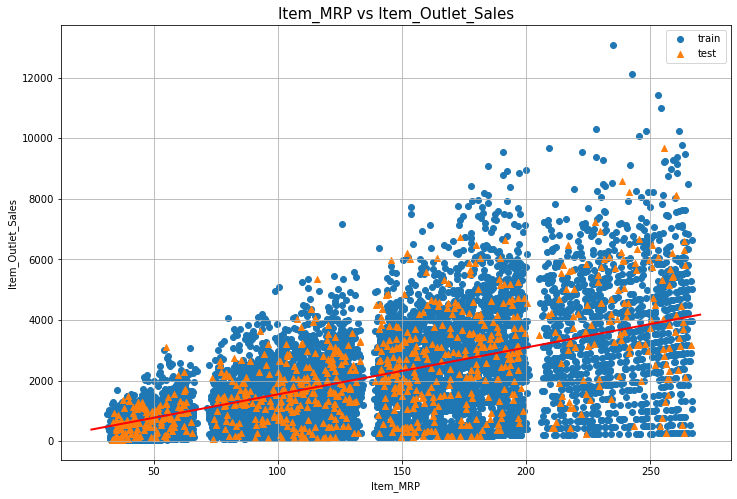

In [498]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, marker='^', label='test')
plt.plot(xs, ys, 'r-', lw=2)
plt.grid()
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_MRP vs Item_Outlet_Sales', fontsize=15)
plt.legend()
plt.show()

상품의 가격이 높을수록 매출 증가


# 회귀모델 비교

### 1. 선형회귀

In [479]:
mse_lr

1766126.2592614936

### 2. DecisionTree

In [480]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=2021)
dtr.fit(X_train, y_train)
pred_dt = dtr.predict(X_test)
mse_dt = mean_squared_error(y_test, pred_dt)
mse_dt

3559776.1055725925

### 3. SupportVectorMachine

In [481]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
pred_sv = svr.predict(X_test)
mse_sv = mean_squared_error(y_test, pred_sv)
mse_sv

2156851.7180186016

### 4. Random Forest

In [482]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2021)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
mse_rf = mean_squared_error(y_test, pred_rf)
mse_rf

2691239.671286455

### 5. XGBoost

In [483]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred_xg = xgb.predict(X_test)
mse_xg = mean_squared_error(y_test, pred_xg)
mse_xg

2030611.2846164952

# 비교

회귀 모델별 예상값 비교

In [484]:
df = pd.DataFrame({
    'y_test' : y_test,
    'LR' : pred_lr,
    'DT' : pred_dt,
    'SVM' : pred_sv,
    'RF' : pred_rf,
    'XGB' : pred_xg
})
df.head()

,y_test,LR,DT,SVM,RF,XGB
819,3942.8676,2882.551598,2816.3340,2425.772257,2741.462824,2861.426270
3828,1086.5856,1405.198083,950.7624,1406.936814,1202.292081,1239.376221
4979,1569.9564,1353.649243,1831.6158,1365.955452,1522.591388,1369.467651
3876,5033.4480,2794.449381,3056.0220,2392.133902,3572.406493,3239.648193
927,1569.9564,1341.261417,1133.8574,1356.323400,1040.676471,1316.009888


회귀 모델별 MSE값 비교

In [504]:
mse_lr, mse_dt, mse_sv, mse_rf, mse_xg
print(f'LinearRegression : {mse_lr:.4f}\nDecisionTreeRegressor : {mse_dt:.4f}\nSupportVectorMachine : {mse_sv:.4f}\nRandomForestRegressor : {mse_rf:.4f}\nXGBRegressor : {mse_xg:.4f}')


LinearRegression : 1766126.2593
DecisionTreeRegressor : 3559776.1056
SupportVectorMachine : 2156851.7180
RandomForestRegressor : 2691239.6713
XGBRegressor : 2030611.2846
